http://benalexkeen.com/linear-programming-with-python-and-pulp/

# Intro to Linear Programming - Example

## Objective Function

$$
Z = 4x + 3y
$$

- We want to maximize $Z$

## Constraints

$$
x \geq 0 \\
y \geq 2 \\
2y \leq 25 - x \\
4y \geq 2x - 8 \\
y \leq 2x - 5
$$

- We can plot these constraints to create an area of "candidate points"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 10, 10

**1. $x \geq 0 $**

- This just means that our `x` array starts at 0

In [3]:
x = np.arange(0, 20, 0.01)

** 2. $y \geq 2$ **

- To show this constraint, we'll plot a horizontal line at $y=2$
    - All "candidate points" must be **above** this line

In [4]:
y_1 = np.repeat(2, len(x))

** 3. $2y \leq 25 - x$ **

- To think of this contraint on a chart, we set $2y = 25 - x \implies y = \frac{-x + 25}{2}$ 
    - We plot this line, and all "candidate points" must be **below** the line

In [5]:
y_2 = (-x + 25) / 2

** 4. $4y \geq 2x - 8$**

- Set $4y = 2x - 8 \implies y = \frac{x - 4}{2}$
    - All "candidate points" must lie **above** this line

In [6]:
y_3 = (x - 4) / 2

** 5. $y \leq 2x - 5$**

- All candidate points are **below** the line $y = 2x-5$

In [7]:
y_4 = 2 * x - 5

- In summary, we can only consider points:
    - **Above**
        1. $y=2$
        2. $y = \frac{x - 4}{2}$
    - **Below**
        3. $y = \frac{-x + 25}{2}$
        4. $y= 2x - 5$
        
- Putting this all together, we know our points must be **above** the **maximum** of 1 and 2, and **below** the **minimum** of 3 and 4

In [8]:
y_above = np.maximum(y_1, y_3)
y_below = np.minimum(y_2, y_4)

- Plotting these constraints

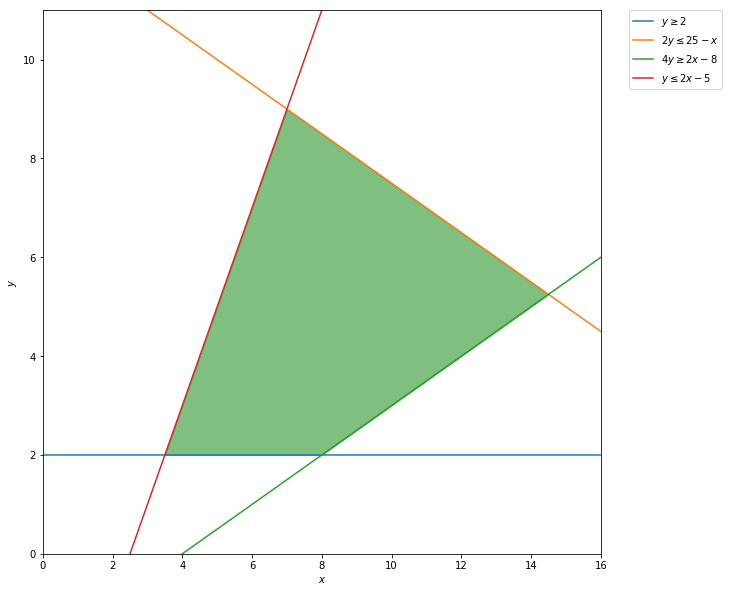

In [9]:
plt.plot(x, y_1, label=r'$y\geq2$')
plt.plot(x, y_2, label=r'$2y\leq25-x$')
plt.plot(x, y_3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y_4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.fill_between(x, y_above, y_below, where=y_above<y_below, color='green', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- As we can see, our optimal solution lies somewhere in the green space

In [10]:
df_points = pd.DataFrame({'x':x, 'y_above':y_above, 'y_below': y_below})
df_candidate_points = df_points[df_points['y_above'] < df_points['y_below']]

y_array = np.arange(2, 10, 0.01)

df_results = pd.DataFrame(columns = ['x', 'y'])

for x_val, y_min, y_max in df_candidate_points.values:
    y_values = [y for y in y_array if (y>=y_min)&(y<=y_max)]
    df_temp = pd.DataFrame({'y':y_values})
    df_temp['x'] = x_val
    df_results = df_results.append(df_temp, ignore_index=True, sort=False)
df_results['z'] = 4*df_results['x'] + 3*df_results['y']

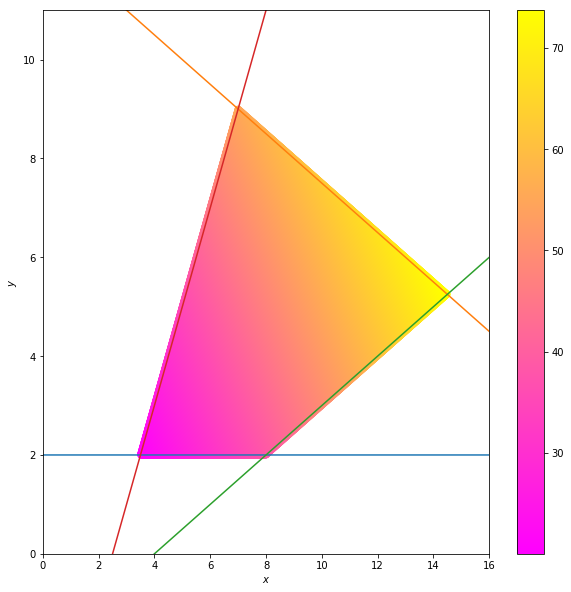

In [12]:
plt.plot(x, y_1, label=r'$y\geq2$')
plt.plot(x, y_2, label=r'$2y\leq25-x$')
plt.plot(x, y_3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y_4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.scatter(df_results.x.values, df_results.y.values, c = df_results.z.values, cmap = plt.cm.spring)
plt.colorbar()
plt.show()

- As we can see from this plot, the maximum value of $Z$ occurs at the combination furthest to the right
    - This agrees with the fact that **the max and min values in a linear programming problem always occur at the vertices**
- **Note**: we could just use our dataframe above to find the maximum since we solved for pretty much every possible combination of values

In [15]:
df_results.loc[df_results['z'].idxmax()]

x    14.49
y     5.25
z    73.71
Name: 401675, dtype: float64

- But this was an inefficient way to solve the problem since we had to loop through all possible combinations
    - This is called **brute force** optimization

____

# Solving our problem with PuLP

In [17]:
import pulp

In [18]:
my_problem = pulp.LpProblem("Solving for Z", pulp.LpMaximize)

In [19]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

In [21]:
# Objective function
my_problem += 4 * x + 3 * y, "Z"

# Constraints
my_problem += 2 * y <= 25 - x
my_problem += 4 * y >= 2 * x - 8
my_problem += y <= 2 * x - 5

- Seeing what we're constructed

In [23]:
my_problem

Solving for Z:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [25]:
my_problem.solve()

1

In [32]:
for variable in my_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print("Max Z = {}".format(pulp.value(my_problem.objective)))

x = 14.5
y = 5.25
Max Z = 73.75


____

# Real World Examples

# 1. Resourcing Problem

- We're consulting for a boutique car manufacturer, producing luxury cars
- The manufacturer runs on 30 day cycles
- There is one robot, 2 engineers, and one detailer in the factory
    - Because of vacation, the detailer is only in the factory for 21 days
    
- Each car requires a different amount of time with each resource and has a different level of profitability

In [39]:
df = pd.DataFrame({'Model A':[3,5,1.5, 30000],'Model B':[4.0,6,3, 45000]},
                  index = ['Robot Time (days)', 'Engineer Time (days)', 'Detailer Time (days)', 'Profit ($)'])
df

,Model A,Model B
Robot Time (days),3.0,4.0
Engineer Time (days),5.0,6.0
Detailer Time (days),1.5,3.0
Profit ($),30000.0,45000.0


- The factory currently produces 4 of each car per month
    - This generates a total profit of $4\cdot 30000 + 4\cdot 45000 = 300000$
        - We think we can improve on this

### Objective Function
$$
\text{Profit} = 30000 \cdot n_{A} + 45000 \cdot n_{B}
$$

- This is the function we want to maximize

### Constraints

$$
\text{(1) }n_{A} \geq 0 \\
\text{(2) }n_{B} \geq 0 \\
\text{(3) }3\cdot n_{A} + 4\cdot n_{B} \leq 30 \\
\text{(4) }5\cdot n_{A} + 6\cdot n_{B} \leq 60 \\
\text{(5) }1.5\cdot n_{A} + 3\cdot n_{B} \leq 21
$$

In [40]:
car_problem = pulp.LpProblem("Car Manufacturing Profit Maximization", pulp.LpMaximize)

- **Note**: in this problem, $n_{A}$ and $n_{B}$ must be **integers** (because we can't produce half a car!)

In [41]:
n_A = pulp.LpVariable('n_A', lowBound=0, cat='Integer')
n_B = pulp.LpVariable('n_B', lowBound=0, cat='Integer')

In [43]:
# Objective function
car_problem += 30000 * n_A + 45000 * n_B, "Profit"

# Constraints
car_problem += 3 * n_A + 4 * n_B <= 30
car_problem += 5 * n_A + 6 * n_B <= 60
car_problem += 1.5 * n_A + 3 * n_B <= 21

In [44]:
car_problem.solve()
pulp.LpStatus[car_problem.status]

'Optimal'

In [46]:
# Print our decision variable values
print("Production of Car A = {}".format(n_A.varValue))
print("Production of Car B = {}".format(n_B.varValue))
print("Max Profit Generated = {}".format(pulp.value(car_problem.objective)))

Production of Car A = 2.0
Production of Car B = 6.0
Max Profit Generated = 330000.0


- As we can see, if the company produces 6 of car B and 2 of car A, they'll increase monthly profits by 30,000